# Cross-Country Comparison of Solar Potential

This notebook synthesizes cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences across countries. The analysis includes:

1. **Metric Comparison**: Boxplots and summary statistics for GHI, DNI, and DHI.
2. **Statistical Testing**: Assessing the significance of differences in GHI values across countries.
3. **Key Observations**: Highlighting actionable insights.
4. **(Bonus) Visual Summary**: Ranking countries by average GHI.

In [1]:
# Load Cleaned Datasets
import pandas as pd

# File paths
data_files = {
    'Benin': '../src/data/benin_clean.csv',
    'Sierra Leone': '../src/data/sierraleone-bumbuna.csv',
    'Togo': '../src/data/togo-dapaong_qc.csv'
}

# Load datasets into DataFrames
data = {country: pd.read_csv(path) for country, path in data_files.items()}

# Display the first few rows of each dataset
for country, df in data.items():
    print(f"{country} Dataset:")
    print(df.head(), "\n")

Benin Dataset:
             Timestamp    GHI    DNI    DHI  ModA  ModB  Tamb    RH   WS  \
0  2021-08-09 00:01:00  474.2  345.7  213.4   0.0   0.0  26.2  93.4  0.0   
1  2021-08-09 00:02:00  474.2  345.7  213.4   0.0   0.0  26.2  93.6  0.0   
2  2021-08-09 00:03:00  474.2  345.7  213.4   0.0   0.0  26.2  93.7  0.3   
3  2021-08-09 00:04:00  474.2  345.7  213.4   0.0   0.0  26.2  93.3  0.2   
4  2021-08-09 00:05:00  474.2  345.7  213.4   0.0   0.0  26.2  93.3  0.1   

   WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0     0.4      0.1  122.1      0.0  998         0            0.0   26.3   26.2  
1     0.0      0.0    0.0      0.0  998         0            0.0   26.3   26.2  
2     1.1      0.5  124.6      1.5  997         0            0.0   26.4   26.2  
3     0.7      0.4  120.3      1.3  997         0            0.0   26.4   26.3  
4     0.7      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

Sierra Leone Dataset:
          Timestam

C:\Users\Kaleb\AppData\Local\Temp\ipykernel_6012\1808982247.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Country', y=metric, palette='Set2')


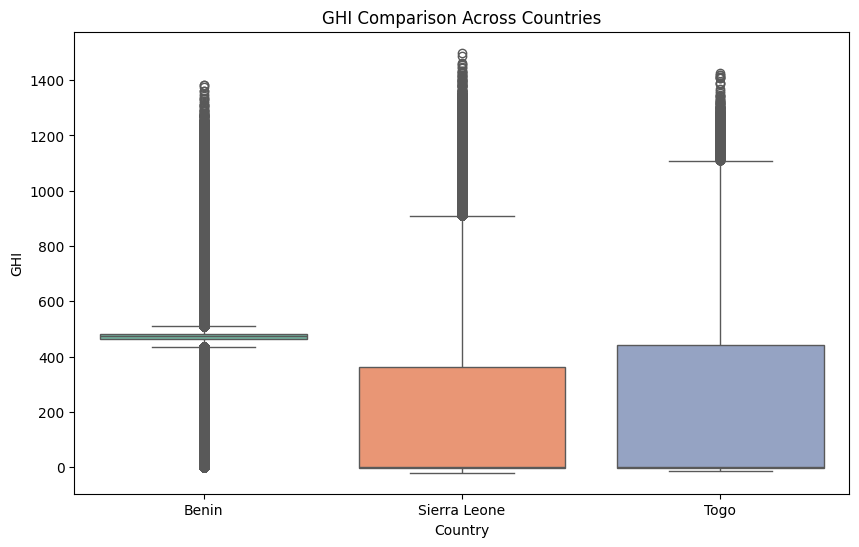

C:\Users\Kaleb\AppData\Local\Temp\ipykernel_6012\1808982247.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Country', y=metric, palette='Set2')


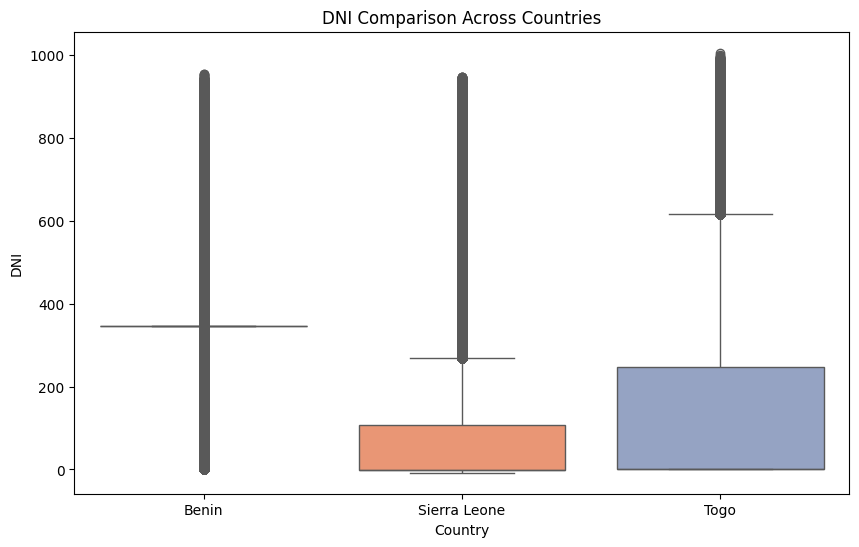

C:\Users\Kaleb\AppData\Local\Temp\ipykernel_6012\1808982247.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Country', y=metric, palette='Set2')


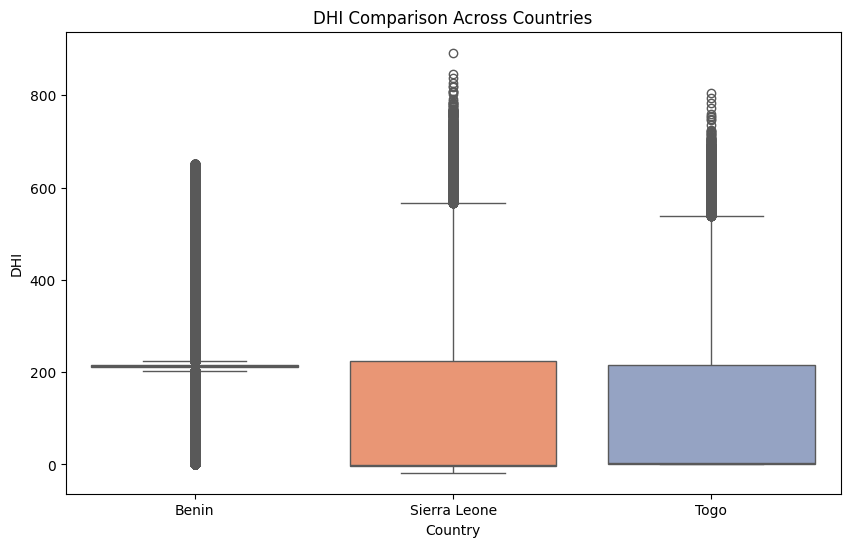

Summary Statistics:
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         475.206157  474.2  228.130919  349.637976  345.7  193.238372   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         221.678172  213.4  106.193010  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714  


In [2]:
# Metric Comparison
import matplotlib.pyplot as plt
import seaborn as sns

# Combine data for plotting
import pandas as pd
combined_data = pd.concat([df.assign(Country=country) for country, df in data.items()])

# Boxplots for GHI, DNI, DHI
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_data, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} Comparison Across Countries')
    plt.show()

# Summary Table
summary_stats = combined_data.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
print("Summary Statistics:")
print(summary_stats)

In [3]:
# Statistical Testing
from scipy.stats import f_oneway, kruskal

# Perform one-way ANOVA and Kruskal-Wallis test on GHI
ghi_data = [df['GHI'] for df in data.values()]
anova_result = f_oneway(*ghi_data)
kruskal_result = kruskal(*ghi_data)

print("One-way ANOVA p-value:", anova_result.pvalue)
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)

One-way ANOVA p-value: 0.0
Kruskal-Wallis p-value: 0.0


### Key Observations
- Benin shows the highest median GHI but also the greatest variability.
- Sierra Leone has the lowest average GHI, indicating lower solar potential.
- Togo demonstrates consistent GHI values with moderate variability, making it a stable option for solar projects.

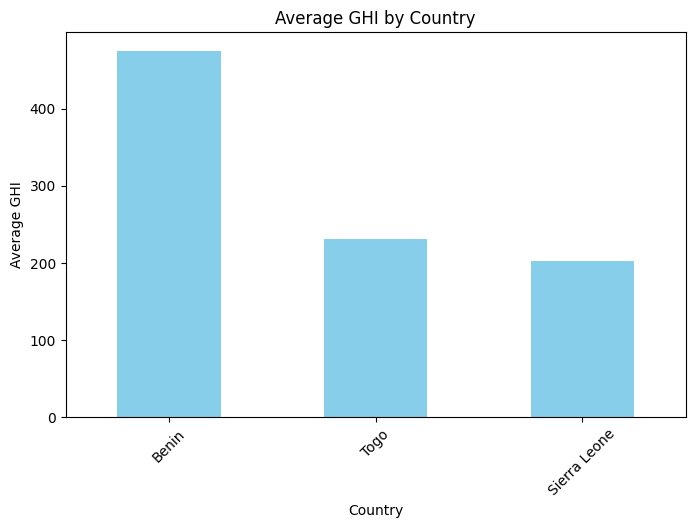

In [4]:
# Visual Summary
import matplotlib.pyplot as plt

# Bar chart ranking countries by average GHI
avg_ghi = combined_data.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
avg_ghi.plot(kind='bar', color='skyblue')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()